In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import category_encoders as ce
import numpy as np
from sklearn.utils import resample
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# Looking at the dataset
The goal of this project is to determine what factors affect the customer churn rate. 
First I will go over the data provoded and take a look at the seperate features will minimal data adjustment. I will then start data preprocessing and looking to manipulate the data to better understand relationships 

In [31]:
# load dataset
data= pd.read_csv('data/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# remove customer ID
data.drop(columns=['customerID'], inplace=True)



In [33]:
# list oput the columns names 
column_names = data.columns.tolist()
print("Column names:", column_names)

# no. of columns
num_columns = len(column_names)
print("Total number of columns:", num_columns)

#print numerical colums
numeric_cols = data.select_dtypes(include='number').columns.tolist()
print("Numerical columns:", numeric_cols)

non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()
print("Non-numerical columns:", non_numeric_cols)

Column names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Total number of columns: 20
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Non-numerical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


The code above shows that there are 19 columns that can be used to predict churn with majority of them being catergorical. Below are some graphs to find the split of features within the dataset.
Before getting into that I left 2 columns were as the wrong data type. 
- TotalCharges needs to be a numeric value 
- Senior Citizen needs to be a catergorial variable

In [34]:
#total charges 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# senior citizen
data['SeniorCitizen']= data['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


numeric_cols = data.select_dtypes(include='number').columns.tolist()
print("Numerical columns:", numeric_cols)

non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()
print("Non-numerical columns:", non_numeric_cols)


Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Non-numerical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


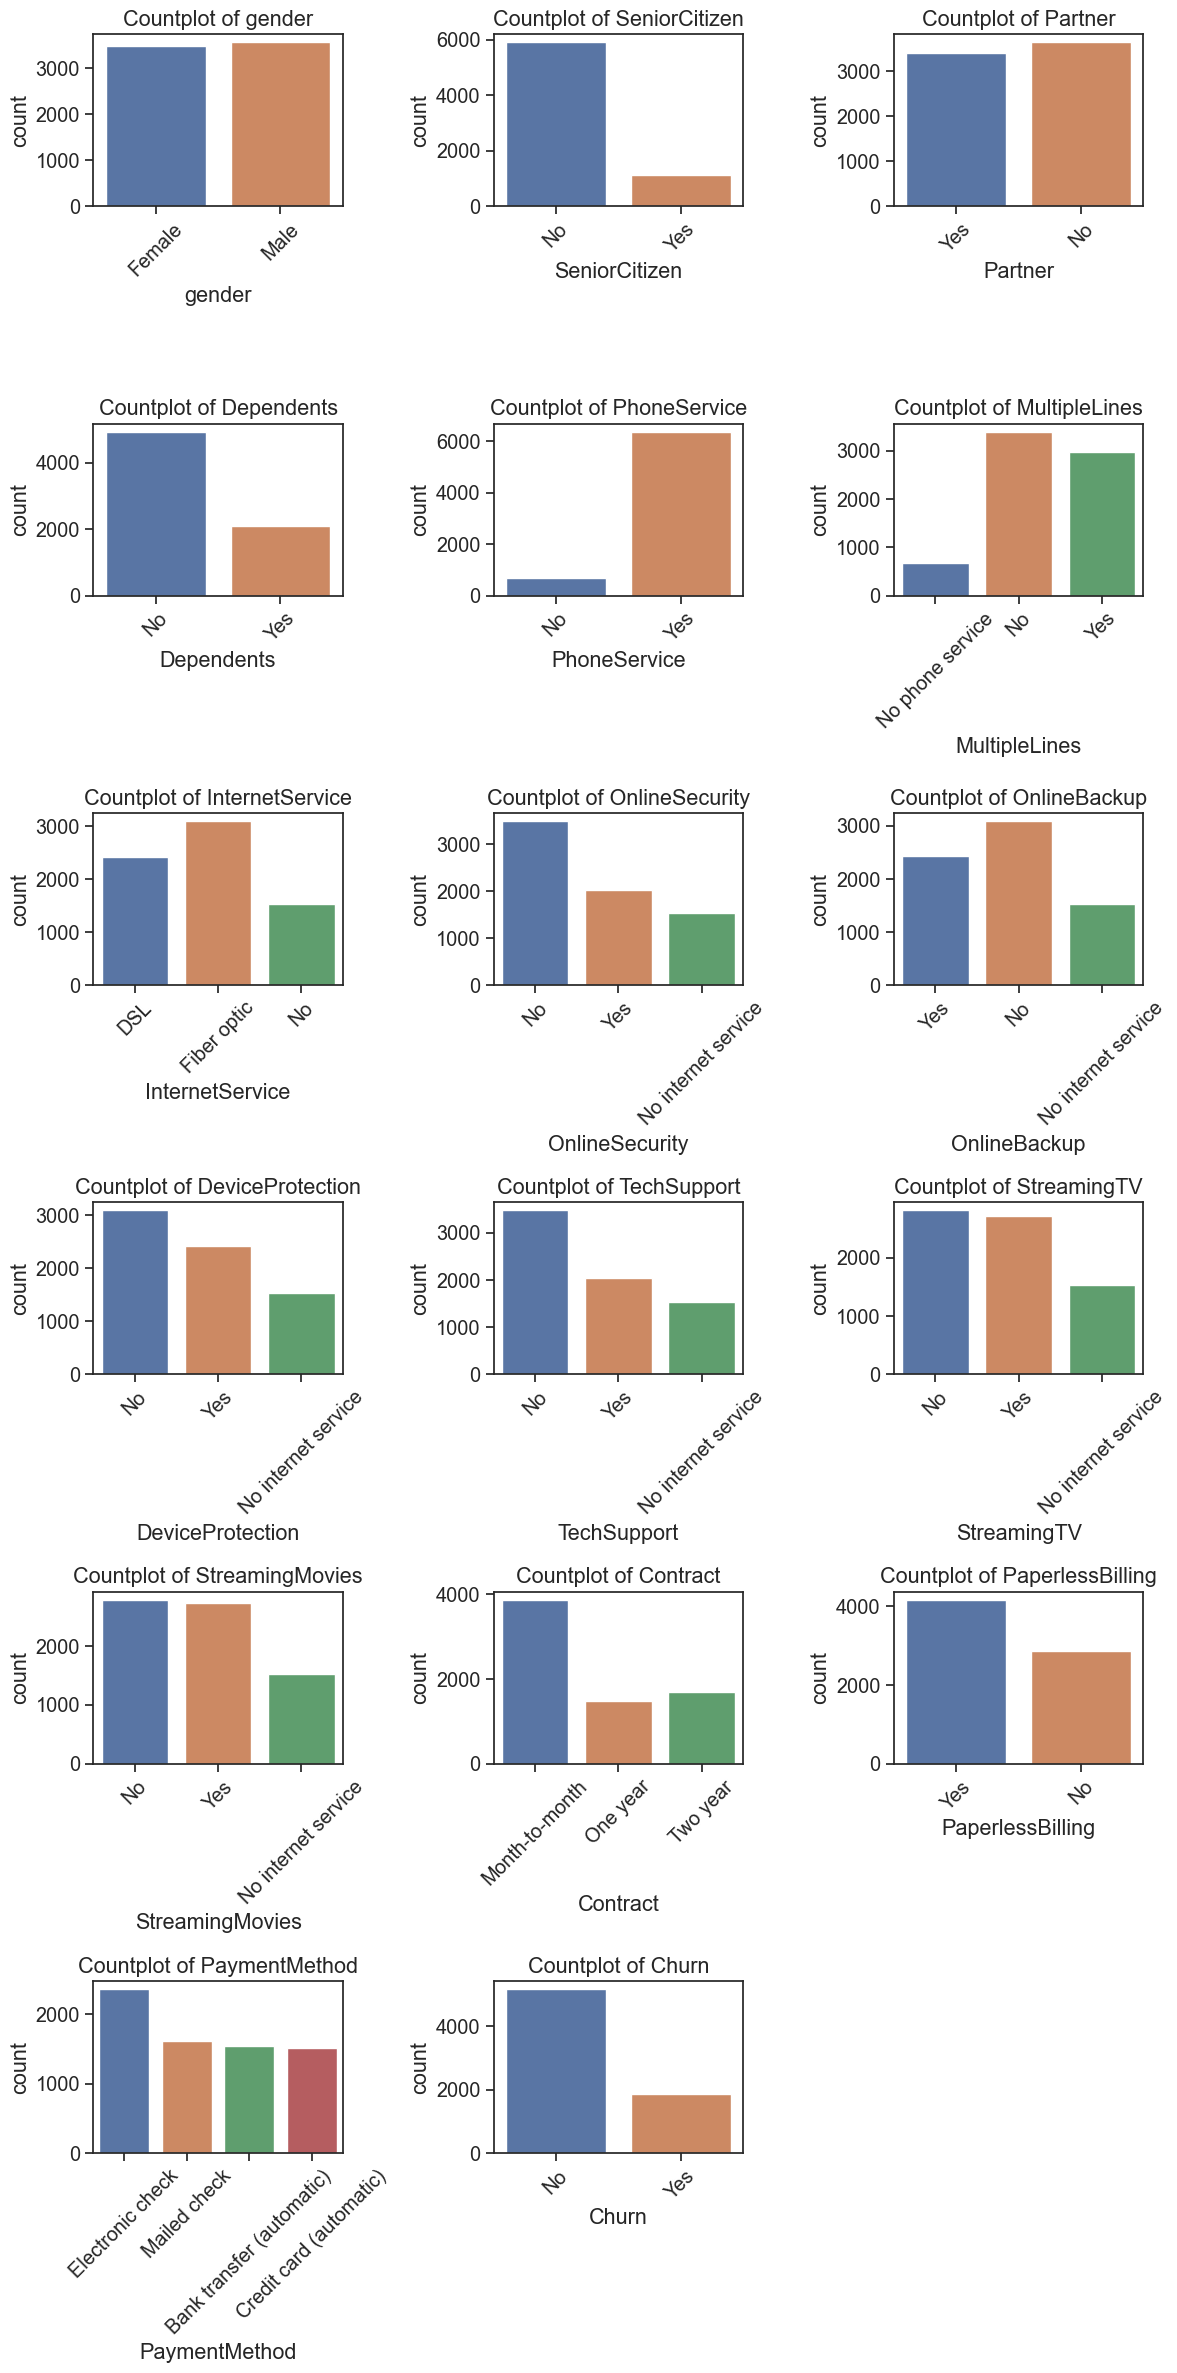

In [35]:
n_cols = 3 
n_rows = (len(non_numeric_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(non_numeric_cols):
    sns.countplot(data=data, x=col, ax=axes[i], hue=non_numeric_cols[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Non numeric features
Above is a look at the data distribution of all the non numeric features
First looking at Churn as it is what we plan to predict- there is majority customers that retain in the dataset. An estimate ratio is 1:3 cutsomers churn. 

Looking from top right to bottom left:
- The features Gender and Partner are evenly split between the 2 catergories each
- most customers are not senior citizens
- Dependents is split in a 2:1 towards NO
- Nearly all customers have a phone service which is reflected in the multiple lines plot 
    - note remove the no phone service from multiple line graph in the future
- The other graphs look normal with none standing out in particular
- A good portion of the following graphs have a reptive number for the number of users with no internet service. 
    - should find a way to remove this repitive information
- should change the name of option in Payment method to remove '(automatic)' from the catergory when ploting graphs, no need when one hot encoding

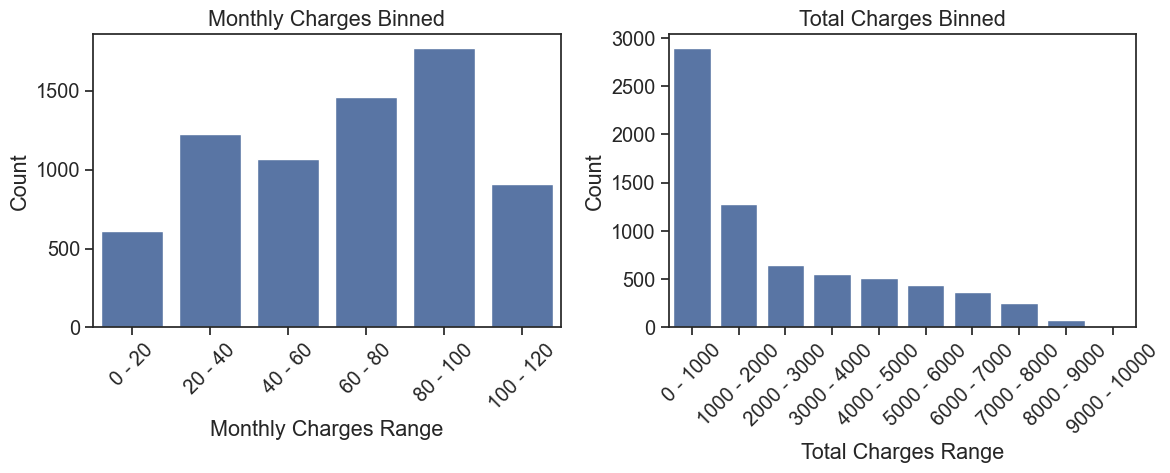

In [36]:
df = data.copy(deep=True)

#create bins for plot
bins0 = range(0, 140, 20)
df['Monthly_Bin'] = pd.cut(df['MonthlyCharges'], bins=bins0, right=False)
bin0_counts = df['Monthly_Bin'].value_counts().sort_index()

bins1 = range(0, 11000, 1000)
df['Total_Bin'] = pd.cut(df['TotalCharges'], bins=bins1, right=False)
bin1_counts = df['Total_Bin'].value_counts().sort_index()

# Create bin labels that include the upper bound
bin0_labels = [f"{int(interval.left)} - {int(interval.right)}" for interval in bin0_counts.index]
bin1_labels = [f"{int(interval.left)} - {int(interval.right)}" for interval in bin1_counts.index]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=bin0_labels, y=bin0_counts.values, ax=axes[0])
axes[0].set_title('Monthly Charges Binned')
axes[0].set_xlabel('Monthly Charges Range')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=bin1_labels, y=bin1_counts.values, ax=axes[1])
axes[1].set_title('Total Charges Binned')
axes[1].set_xlabel('Total Charges Range')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


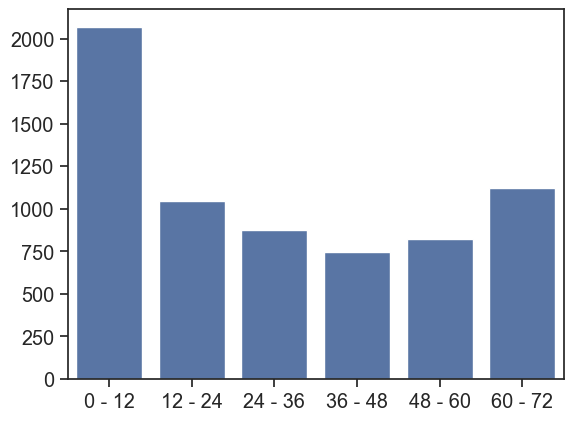

In [37]:

#create bins for plot
bins = range(0, 84, 12)
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, right=False)
bin_counts = df['tenure_bin'].value_counts().sort_index()
bin_labels = [f"{int(interval.left)} - {int(interval.right)}" for interval in bin_counts.index]

sns.barplot(x=bin_labels, y=bin_counts.values)
axes[0].set_title('tenure Binned')
axes[0].set_xlabel('tenure Range')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

## Numerical data
- The total charges decreases expoentially meaning very few people are long time customers or are in small packages where there is small amounts charged
- the monthly charges are well distributed meaning the income to the store is from a various amount of services combined
- Looking at the tensure graph we can infer that either the buisness got popular reletively recently so the new influx of customers are new customers around the 0-24 months period or most customers that do churn do it between the 2-5 year period. There are also a good amount of loyal customers.

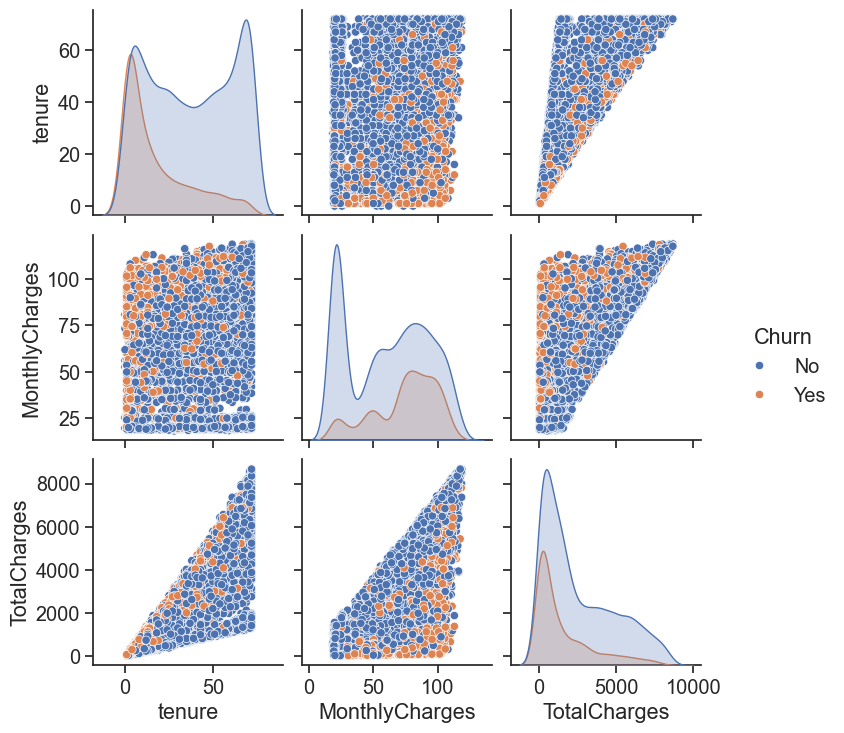

In [38]:
sns.pairplot(data, hue='Churn', diag_kind='kde')  # or diag_kind='hist'
plt.show()

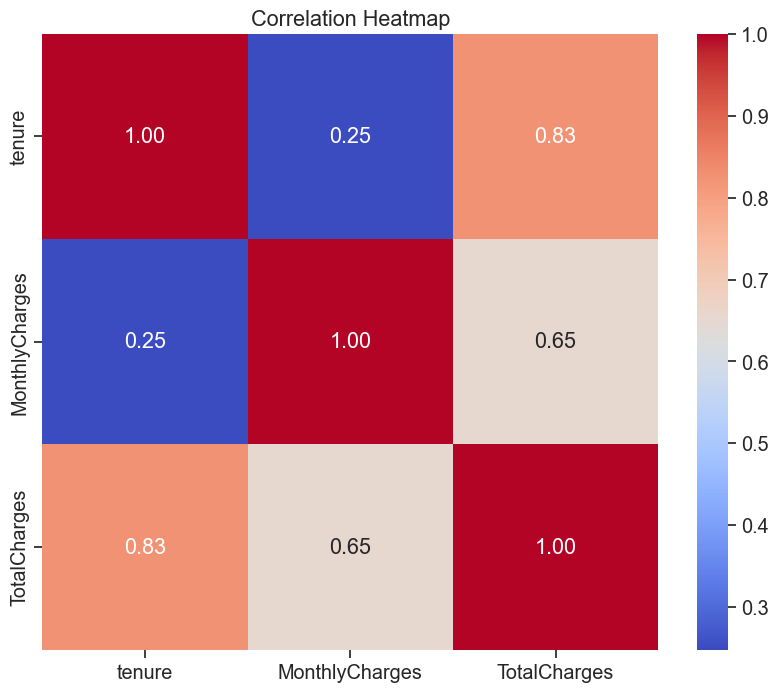

In [39]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

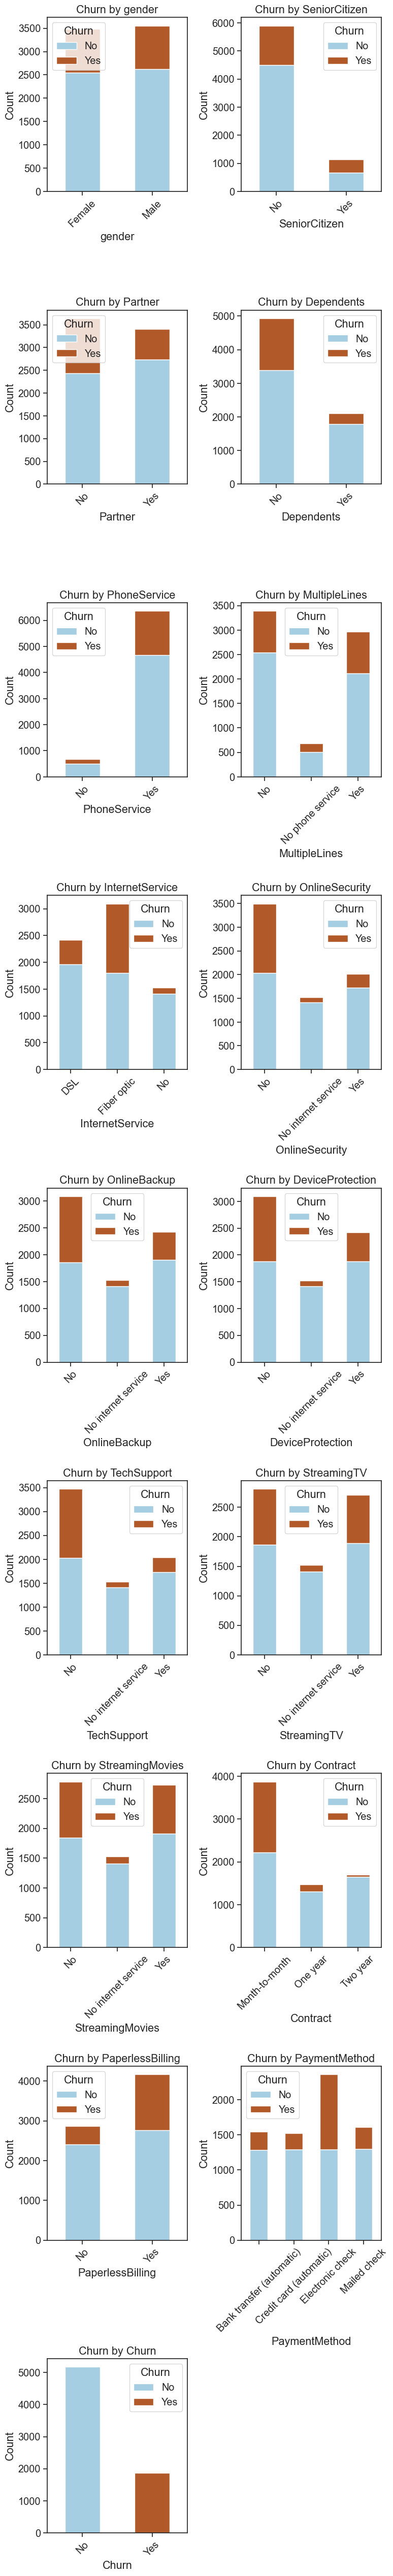

In [40]:

# remove churn since used as hue
#non_numeric_cols.remove('Churn')


fig, axes = plt.subplots(math.ceil(len(non_numeric_cols)/2), 2, figsize=(8, 3*len(non_numeric_cols)))
axes = axes.flatten()
'''
# side by side bars for churn vs other catergorical var
for i, col in enumerate(non_numeric_cols):
    ax = axes[i] if len(non_numeric_cols) > 1 else axes  
    sns.countplot(data=data, x=col, hue='Churn', ax=ax, palette='pastel')
    ax.set_title(f'Churn by {col}')
    ax.set_ylabel("Count")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)
    '''

#stacked barplots

for i, col in enumerate(non_numeric_cols):
    stacked = data.groupby([col, 'Churn']).size().unstack(fill_value=0)
    stacked.plot(kind='bar', stacked=True, ax=axes[i], colormap='Paired')
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## bivariate analysis
The graphs above are the last part of the data exploration
The goal is to see it any of the features have relenvce to churn such that majority of 1 subset of customers churn under a specific situation with simple co-relation
However, we need to be carful when dealing with this data as in general there are less people churning than not, to prevent this we need to pay attension to the churn bars more than the bars without churn

- directly we can say that gender alone has no effect on the churn rate as it is evenlyu split between them. 
- approximately 40% of senior citizens churn
- customers without partners or dependents are more likely to churn 
- nothing much can be gained from the phone line graphs
- it seems people with fibre optic, no online security, no online backup, no device protection, and no tech support  tend to be more likely to churn
- the streaming services have little affect
- month to month contracts tend to be more likely to churn than the yearly and 2 year contracts
- when paid with electronic check customers tend to churn

Overall, this gave us an idea of where to start with when plotting and finding relationships between features and churn  rate

# Data Preprocessing
This is an important part of the project. The data provided needs to be cleaned and processed to be used with a model for reliable results.
This portion will include: 
- feature management -> this was done in the previous part during exploration(change feature type, remove irrelavent features)
- handeling missing values(numeric and catergorical)
- normalise features
- one hot encoding for catergorical variables
- dataset splitting
- data imbalance
- hyper parameter tuning - not sure as of now how to do

These tasks will mainly be done in functions so that later in the project when i plan to transfer majority of it to python files its easier and for resuability in future projects.

## Missing values
This is important as if there are missing values when the data is fed into the model it will cause it to break displaying an error message or give incorrect predictions throwing the model off. 
At the begining the dataset had 11 Nan values which were all resolved.
- For numeric data the Nan value was replaced with the mean value 
- For catergorial data the record was removed

Luckily there were minimal Nan values and all those seem to be numeric issues so no records were lost.
Lossing records reduces the data present which is an issue for small datasets

In [54]:
def handle_missing_values(df):
    numeric_cols = df.select_dtypes(include='number').columns
    non_numeric_cols = df.select_dtypes(exclude='number').columns

    # fill with mean value if numeric value is na
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    # remove row if non-numeric value is na
    df = df.dropna(subset=non_numeric_cols)

    return df

df = data.copy(deep=True)


print("Before clean nan values: ",pd.isna(df).sum().sum())
print(df.shape)
# if na value exists call function
if pd.isna(df).sum().sum():
    df=handle_missing_values(df)
print("After clean nan values",pd.isna(df).sum().sum())
print(df.shape)

Before clean nan values:  11
(7043, 20)
After clean nan values 0
(7043, 20)


## Normalization
**do this before one hot encoding as the other columns may become numeric but not need to be scaled**

Normalization is important as it prevents numerical values from having a greater importance when the model is training. 
Eg:- if monthly charges and totalcharge is compared the total charge values tend to have a larger range and may be over-considered when making predictions

Below 2 normalization methods are presented(method without library provided in comments):
- minmax -> scale [0,1]
    - sensitive to outliers and does not preserve distribution
    - Neural Nets, KNN, CNN
- z-score -> distributed with normal distibution
    - not sensitive to outliers and preserves distribution
    - SVM, PCA, regression


In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def minmax(df, cols):
    '''
    min_val = column.min()
    max_val = column.max()
    score = (column - min_val) / (max_val - min_val)
    '''


    scaler=MinMaxScaler()
    for i,col in enumerate(cols):
        df[col]= scaler.fit_transform(data[[col]])
    return df

def z_normalization(df, cols):
    '''
    mean = column.mean()
    std = column.std()
    score = (column - mean) / std
    '''

    scaler=StandardScaler()
    for i,col in enumerate(cols):
        df[col]= scaler.fit_transform(data[[col]])
    return df

numeric_cols = df.select_dtypes(include='number').columns.tolist()
df=z_normalization(df, numeric_cols)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994194,No
1,Male,No,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173740,No
2,Male,No,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.959649,Yes
3,Male,No,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195248,No
4,Female,No,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.940457,Yes


## Encoding
This is important when dealing with categorical data. Most models need either numeric or boolean values to understand categorical variables
There are 3 methods implemented above:
- label encoding 
    - works for variables with 2 categories 
    - assigns a category to '0' and a category to '1'
- binary encoding
    - similar to label encoding but for when there are more than 2 categories
    - 2 cols supports 4 cat, 3 cols supports 8 cat
    - used to prevent feature bloat (too many columns)
- one hot encoding
    - a column for a category
    - works well with logistic regression 
    - easy for computer to understand

If a feature is not encoded it may cause errors when training your model

In [56]:
def label_encoding(df,col):
    Cat= df[col].unique()
    #below are different varients use what works best
    if (Cat[0]=='Yes'or Cat[0]=='No'):
        df[col] = df[col].map({"Yes": True, "No": False})
    else:
        df[col] = df[col].map({Cat[0]: 1, Cat[1]: 0})
    #df[col] = df[col].map({"Yes": 1, "No": 0})
    
    return df

def binary_encoding(df,col):
    encoder = ce.BinaryEncoder()
    data_encoded = encoder.fit_transform(df[[col]])
    df = pd.concat([df.drop(col, axis=1), data_encoded], axis=1)
    return df

def one_hot_encoding(df,col):
    df = pd.get_dummies(df, columns=[col], drop_first=True)
    return df

def categorical_encoding(df, cols):
    for i, col in enumerate(cols):
        no_Cat=df[col].nunique()
        if (no_Cat==2):
            df=label_encoding(df,col)
        else:
            #df= binary_encoding(df,col) # used to prevent feature bloat
            df = one_hot_encoding(df,col) #use for logistic regression model
    return df


# get all non numeric values
non_numeric_cols = df.select_dtypes(exclude='number').columns
df= categorical_encoding(df, non_numeric_cols)

# to see if it worked
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,False,True,False,-1.277445,False,True,-1.160323,-0.994194,False,...,False,False,False,False,False,False,False,False,True,False
1,0,False,False,False,0.066327,True,False,-0.259629,-0.173740,False,...,False,False,False,False,False,True,False,False,False,True
2,0,False,False,False,-1.236724,True,True,-0.362660,-0.959649,True,...,False,False,False,False,False,False,False,False,False,True
3,0,False,False,False,0.514251,False,False,-0.746535,-0.195248,False,...,True,False,False,False,False,True,False,False,False,False
4,1,False,False,False,-1.236724,True,True,0.197365,-0.940457,True,...,False,False,False,False,False,False,False,False,True,False


## Data split
Splitting the data into seperate portions is important
We want unaltered data to test our models out with several metrics to see if it is doing well or bad.
We also want a set of validation set so that during the training process we could test between epochs if they are present to direct the model down the right direction
Although it is not complusary to keep a set for validation from the start it is reccommended
We would not need one if we are doing cross validation or k-fold validation

training data is where we can meddle with the data a little. If the data is imbalanced we can add more samples or reduce samples. It is also the data on what the model learns on so majority of the dataset wil go into training data.

In [58]:
np.random.seed(369)

# Shuffle the data
shuffled_data = data.sample(frac=1).reset_index(drop=True)

# Compute split sizes
total_rows = len(shuffled_data)
train_end = int(0.7 * total_rows)
val_end = int(0.85 * total_rows)

# Split the dataset
train_data = shuffled_data.iloc[:train_end]
val_data = shuffled_data.iloc[train_end:val_end]
test_data = shuffled_data.iloc[val_end:]

# Optional: print shapes
print("Train shape:", train_data.shape)
print("Validation shape:", val_data.shape)
print("Test shape:", test_data.shape)

Train shape: (4930, 20)
Validation shape: (1056, 20)
Test shape: (1057, 20)


## imbalanced data

- up sampling
- down sampling
- synthetic minority oversampling technique (SMOTE)
- tomek links

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances

def upsample_minority(df, target_col='Churn'):
    # define what is majority and what is minority
    majority = df[df[target_col] == 'No']
    minority = df[df[target_col] == 'Yes']
    
    #resample until majority and minority is the same
    minority_upsampled = resample(minority,
                                  replace=True,
                                  n_samples=len(majority),
                                  random_state=369)
    
    #combine
    upsampled_df = pd.concat([majority, minority_upsampled])
    #return shuffled df
    return upsampled_df.sample(frac=1, random_state=369).reset_index(drop=True)


def manual_upsample_minority(df, target_col='Churn'):
    # define what is majority and what is minority
    majority = df[df[target_col] == 'No']
    minority = df[df[target_col] == 'Yes']

    # number of new samples to generate
    n_samples_to_generate = len(majority) - len(minority)
    upsampled = minority.sample(n=n_samples_to_generate, replace=True, random_state=42)

    # add to the original dataset and shuffle
    df_balanced = pd.concat([df, upsampled])
    return df_balanced.sample(frac=1, random_state=369).reset_index(drop=True)


#similar to up sampling just oposite
def downsample_majority(df, target_col='Churn'):
    majority = df[df[target_col] == 'No']
    minority = df[df[target_col] == 'Yes']
    
    majority_downsampled = resample(majority,
                                    replace=False,
                                    n_samples=len(minority),
                                    random_state=369)
    
    downsampled_df = pd.concat([majority_downsampled, minority])
    return downsampled_df.sample(frac=1, random_state=369).reset_index(drop=True)

def manual_downsample_majority(df, target_col='Churn'):
    majority = df[df[target_col] == 'No']
    minority = df[df[target_col] == 'Yes']

    majority_downsampled = majority.sample(n=len(minority), replace=False, random_state=42)
    df_balanced = pd.concat([majority_downsampled, minority])
    return df_balanced.sample(frac=1, random_state=369).reset_index(drop=True)

# picked from stack overflow - basic functions
# X -dataframe for x features
# Y -predictor
def apply_smote(X, y):
    smote = SMOTE(random_state=369)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled


def apply_tomek_links(X, y):
    tl = TomekLinks(sampling_strategy='auto')
    X_resampled, y_resampled = tl.fit_resample(X, y)
    return X_resampled, y_resampled


# use KNN - k nearest neighbours
def manual_smote(X, y, target_class='Yes', k=5):
    # Separate minority class
    X_min = X[y == target_class]
    n_min = len(X_min)
    # calculate the needed minority class samples
    n_to_generate = (y != target_class).sum() - n_min

    # k-nearest neighbors for each minority sample
    nn = NearestNeighbors(n_neighbors=k+1)
    nn.fit(X_min)
    neighbors = nn.kneighbors(X_min, return_distance=False)[:, 1:]

    synthetic_samples = []
    for i in range(n_to_generate):
        idx = np.random.randint(0, n_min)
        neighbor_idx = np.random.choice(neighbors[idx])
        diff = X_min.iloc[neighbor_idx] - X_min.iloc[idx]
        gap = np.random.rand()
        new_sample = X_min.iloc[idx] + gap * diff
        synthetic_samples.append(new_sample)

    X_syn = pd.DataFrame(synthetic_samples, columns=X.columns)
    y_syn = pd.Series([target_class] * len(X_syn))

    X_bal = pd.concat([X, X_syn]).reset_index(drop=True)
    y_bal = pd.concat([y, y_syn]).reset_index(drop=True)
    
    return X_bal, y_bal



def manual_tomek_links(X, y):
    dist = pairwise_distances(X)
    np.fill_diagonal(dist, np.inf)  # avoid self-neighbors

    nearest = dist.argmin(axis=1)

    to_drop = []
    for i, j in enumerate(nearest):
        if y.iloc[i] != y.iloc[j] and nearest[j] == i:
            # If they are each other's nearest neighbors
            if y.iloc[i] == 'No':  # drop majority
                to_drop.append(i)
            else:
                to_drop.append(j)

    X_cleaned = X.drop(index=to_drop).reset_index(drop=True)
    y_cleaned = y.drop(index=to_drop).reset_index(drop=True)
    return X_cleaned, y_cleaned
